1. 学习前需要掌握的知识以及问题背景
1.1 学习知识背景
1.2 房价预测问题以及本实战的原始数据(usa_housing_price.csv文件放在文章的末尾，自行取)
2. 根据具体步骤解决问题
2.1 以面积为输入量，建立单因子模型，评估模型表现，可视化线性回归预测结果
2.2 以income、house_age、number of rooms、population、area为输入变量，建立多因子模型，评估模型表现。
3. 预测Income=65000、House Age=5、Numbers of Rooms=5,Population=30000、size=200的合理房价
————————————————

                            版权声明：本文为博主原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接和本声明。
                        
原文链接：https://blog.csdn.net/qq_32575047/article/details/117445825

In [5]:
#load the data
import numpy as np
import pandas as pd
data=pd.read_csv('data/usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


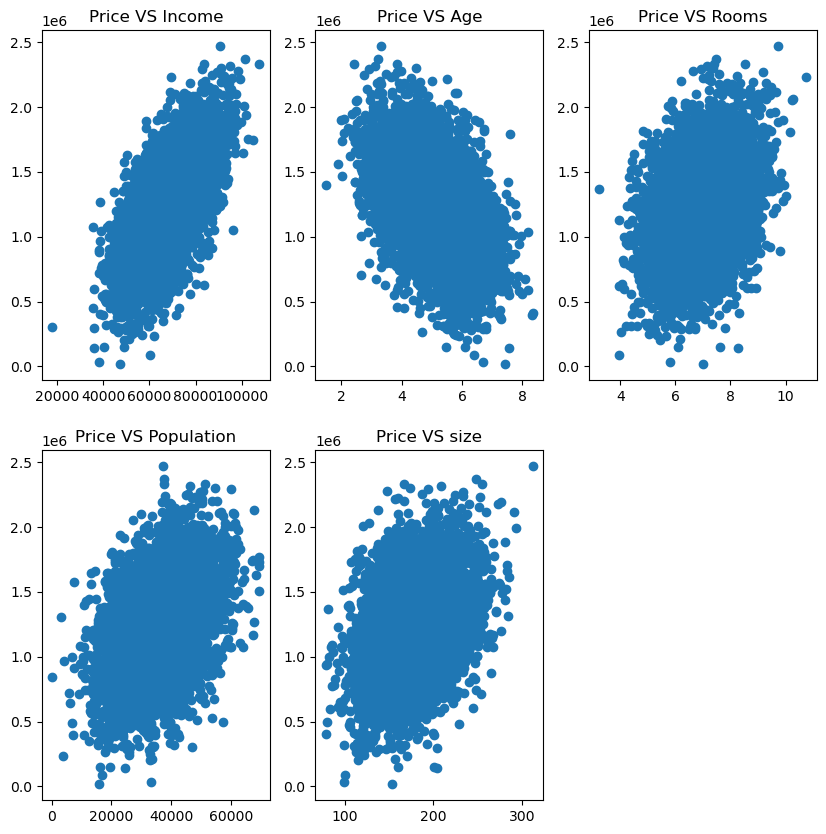

In [6]:
#可视化房价数据
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10)) 
fig1 = plt.subplot(231) #两行三列第一幅图(两行三列：x走两个单元格,y走三个单元格),下同
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])  #plt.scatter(x,y) 花点图 (下同)
plt.title('Price VS Income')
fig2 = plt.subplot(232) 
plt.scatter(data.loc[:,'Avg. Area House Age'],data.loc[:,'Price'])  
plt.title('Price VS Age')
fig3 = plt.subplot(233) 
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price']) 
plt.title('Price VS Rooms')
fig4 = plt.subplot(234) 
plt.scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])  
plt.title('Price VS Population')
fig5 = plt.subplot(235) 
plt.scatter(data.loc[:,'size'],data.loc[:,'Price'])  #plt.scatter(x,y)
plt.title('Price VS size')
plt.show()

Text(0, 0.5, 'Price')

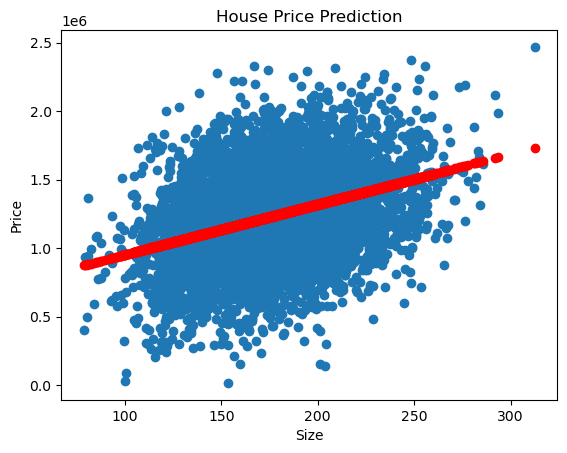

In [7]:
#使用size 数据进行预测

from sklearn.linear_model import LinearRegression

X=data.loc[:,'size']
Y=data.loc[:,'Price']
X=np.array(X).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)

regressor=LinearRegression()
regressor.fit(X,Y)
Y_pred=regressor.predict(X)
plt.scatter(X,Y)
plt.scatter(X,Y_pred,color='red')
plt.title('House Price Prediction')
plt.xlabel('Size')
plt.ylabel('Price')

In [8]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error_1 = mean_squared_error(Y,Y_pred) #MSE
r2_score_1 = r2_score(Y,Y_pred) 
print(mean_squared_error_1,r2_score_1)

108771672553.6264 0.1275031240418234


In [13]:
x_multi = data.drop(['Price'], axis=1)
y=data.loc[:,'Price']
x_multi.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273545
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659


10219846512.17786 0.9180229195220739


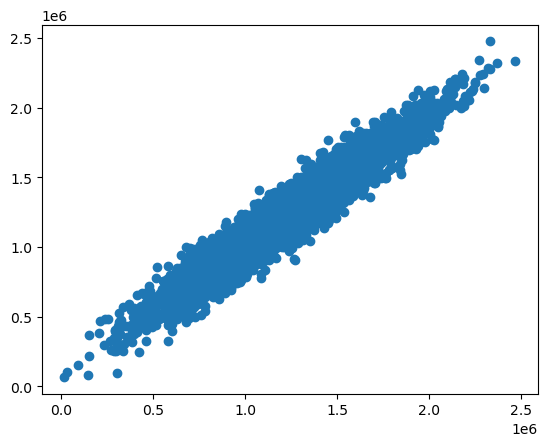

In [14]:

LR_multi = LinearRegression()
LR_multi.fit(x_multi, y)
y_pred_multi = LR_multi.predict(x_multi)
mean_squared_error_multi = mean_squared_error(y,y_pred_multi) #MSE
r2_score_multi = r2_score(y,y_pred_multi) 
print(mean_squared_error_multi,r2_score_multi)

plt.scatter(Y, y_pred_multi)
plt.show()

In [15]:
x_test = [65000,5,5,30000,200]
x_test = np.array(x_test).reshape(1,-1)
y_test_predict = LR_multi.predict(x_test)
print(y_test_predict)

[817052.19516298]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
